In [24]:
import pandas as pd

file1 = pd.read_excel('../Data/附件.xlsx',sheet_name='表单1')
file2 = pd.read_excel('../Data/附件.xlsx',sheet_name='表单2')
file3 = pd.read_excel('../Data/附件.xlsx',sheet_name='表单3')

In [25]:
from tqdm import tqdm
import re
tqdm.pandas()

def clear_id(s):
    ss = str(s)
    n = int(re.findall(r"\d+",ss)[0])
    return n
file2['id'] = file2['Item sample point'].progress_apply(clear_id)
file1['id'] = file1['Item index'].progress_apply(clear_id)

100%|██████████| 58/58 [00:00<00:00, 149888.87it/s]


In [31]:
cols = ['Surface Weathering', '(SiO2)',
       '(Na2O)', '(K2O)', '(CaO)', '(MgO)', '(Al2O3)',
       '(Fe2O3)', '(CuO)', '(PbO)', '(BaO)', '(P2O5)',
       '(SrO)', '(SnO2)', '(SO2)']

In [29]:
file_data = pd.merge(file1,file2,on='id')

file_data.columns

Index(['Item index', 'Engrave', 'Kind', 'Color', 'Surface Weathering', 'id',
       'Item sample point', '(SiO2)', '(Na2O)', '(K2O)', '(CaO)', '(MgO)',
       '(Al2O3)', '(Fe2O3)', '(CuO)', '(PbO)', '(BaO)', '(P2O5)', '(SrO)',
       '(SnO2)', '(SO2)'],
      dtype='object')

In [32]:
Gao_data = file_data[file_data['Kind']=='高钾'][cols]
Qian_data = file_data[file_data['Kind']=='铅钡'][cols]

In [33]:
Qian_data = Qian_data.fillna(0)
Gao_data = Gao_data.fillna(0)

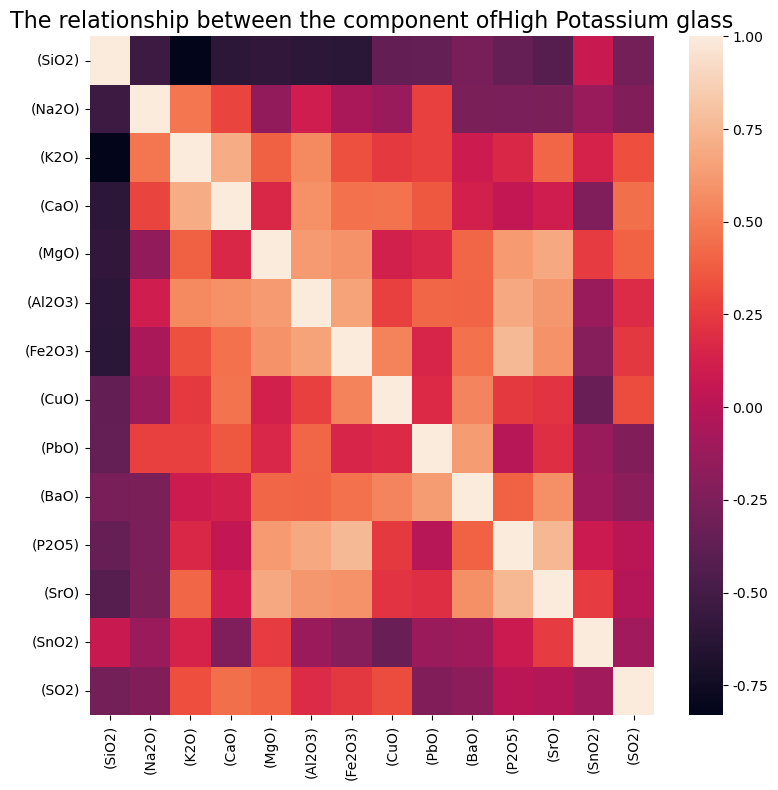

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
df = Gao_data
shifted_cols = df.columns
corrmat = df[shifted_cols].corr()

heatmap = sns.heatmap(corrmat)
ax.set_title('The relationship between the component of High Potassium glass', fontsize=16)
plt.tight_layout()
plt.savefig('高钾玻璃化学成分相关性.png',dpi=300, bbox_inches = 'tight')
plt.show()

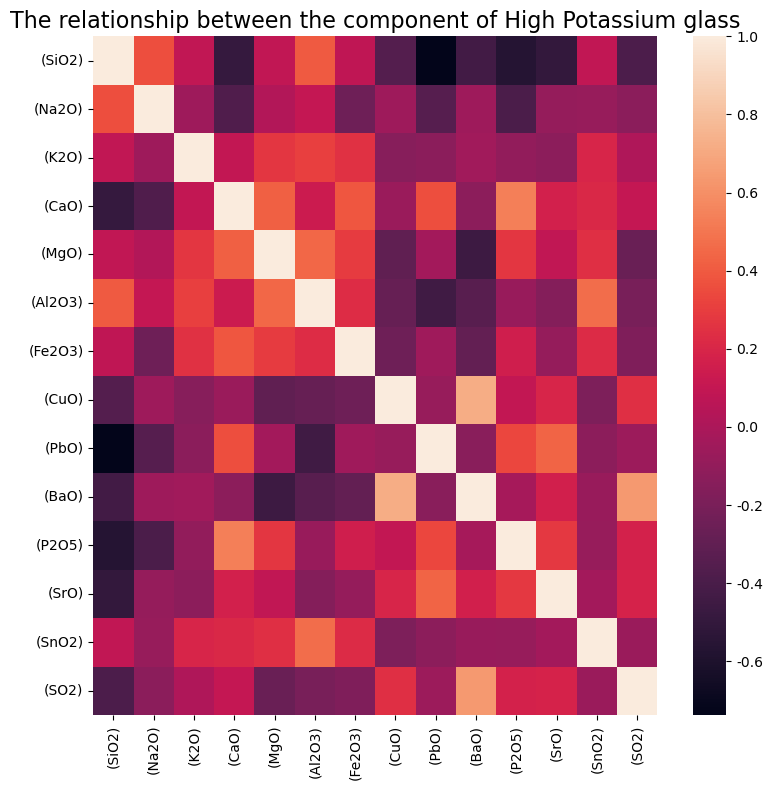

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
df = Qian_data
shifted_cols = df.columns
corrmat = df[shifted_cols].corr()

heatmap = sns.heatmap(corrmat)
ax.set_title('The relationship between the component of Plumbum & Barium glass', fontsize=16)
plt.tight_layout()
plt.savefig('铅钡玻璃化学成分相关性.png',dpi=300, bbox_inches = 'tight')
plt.show()

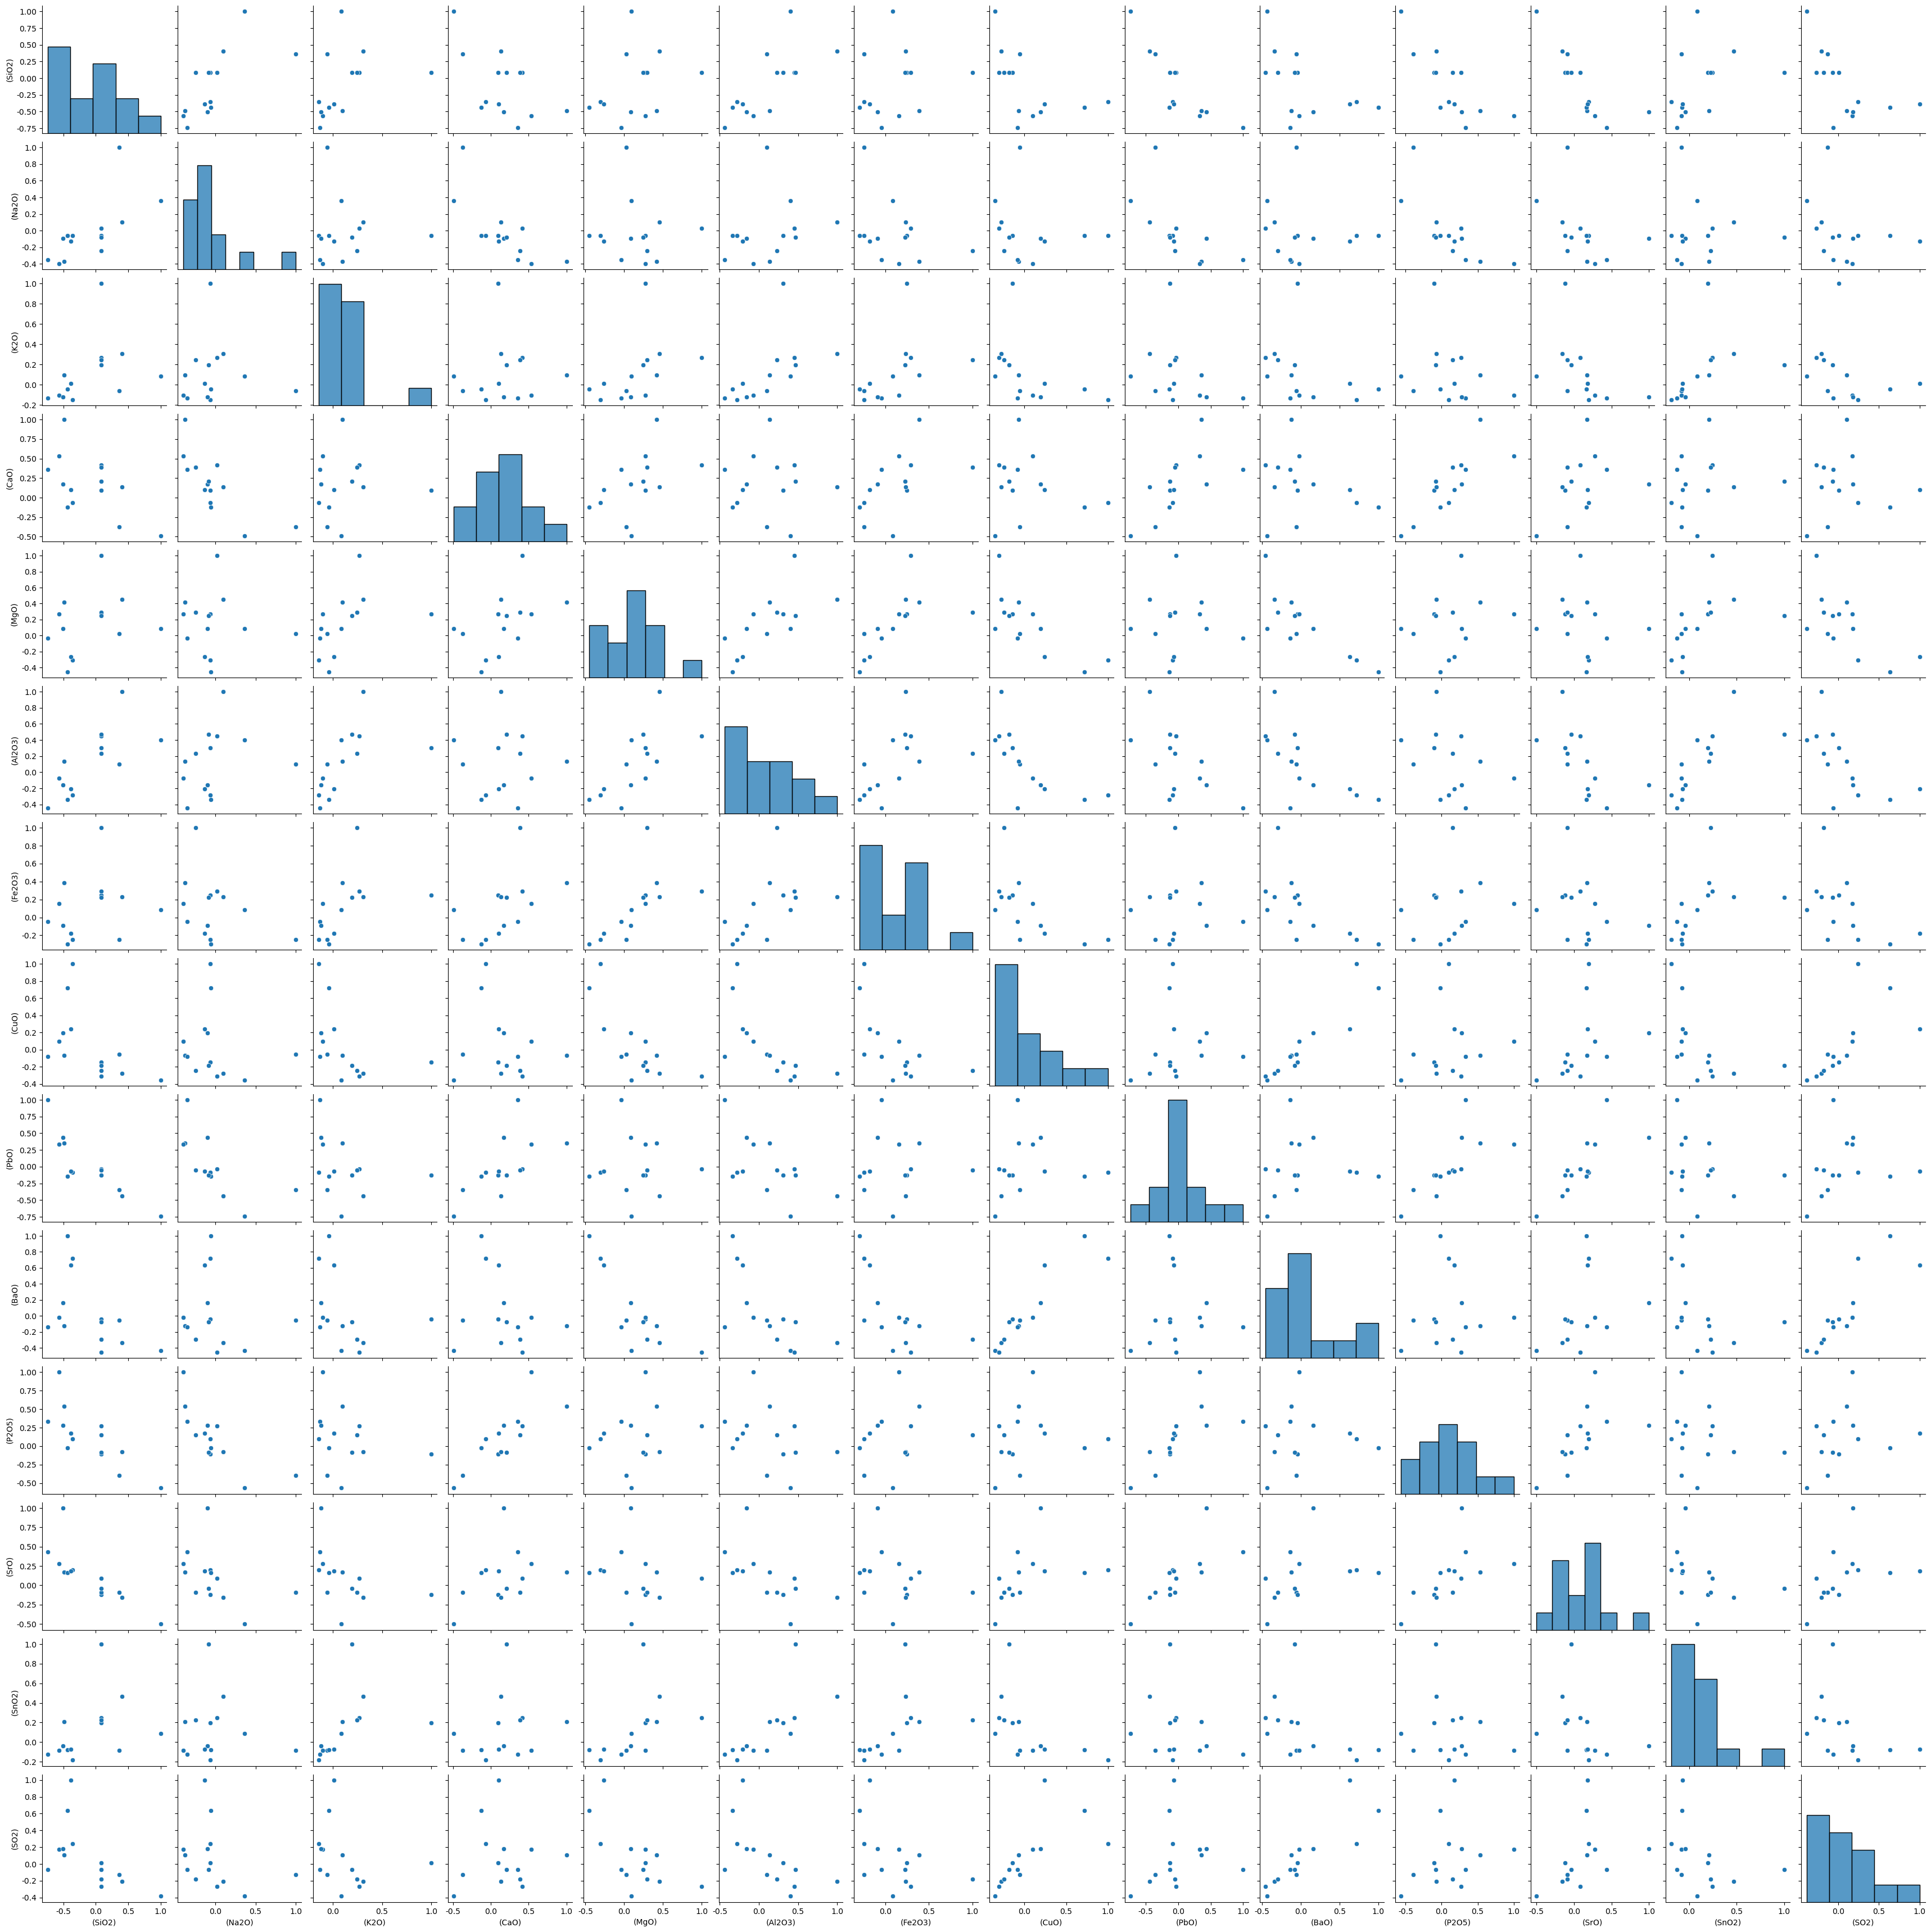

In [36]:
df = Qian_data
shifted_cols = df.columns
corrmat = df[shifted_cols].corr()
sns.pairplot(corrmat)

/Users/ce1ebratechen/opt/anaconda3/envs/Newpython/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 20108 (\N{CJK UNIFIED IDEOGRAPH-4E8C}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/Users/ce1ebratechen/opt/anaconda3/envs/Newpython/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 27687 (\N{CJK UNIFIED IDEOGRAPH-6C27}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/Users/ce1ebratechen/opt/anaconda3/envs/Newpython/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/Users/ce1ebratechen/opt/anaconda3/envs/Newpython/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 30789 (\N{CJK UNIFIED IDEOGRAPH-7845}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/Users/ce1ebratechen/opt/anaconda3/envs/Newpython/lib/python3.9/site

/Users/ce1ebratechen/opt/anaconda3/envs/Newpython/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20108 (\N{CJK UNIFIED IDEOGRAPH-4E8C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ce1ebratechen/opt/anaconda3/envs/Newpython/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27687 (\N{CJK UNIFIED IDEOGRAPH-6C27}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ce1ebratechen/opt/anaconda3/envs/Newpython/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ce1ebratechen/opt/anaconda3/envs/Newpython/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30789 (\N{CJK UNIFIED IDEOGRAPH-7845}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ce1ebratechen/opt/anaconda3/envs/Newpython/li

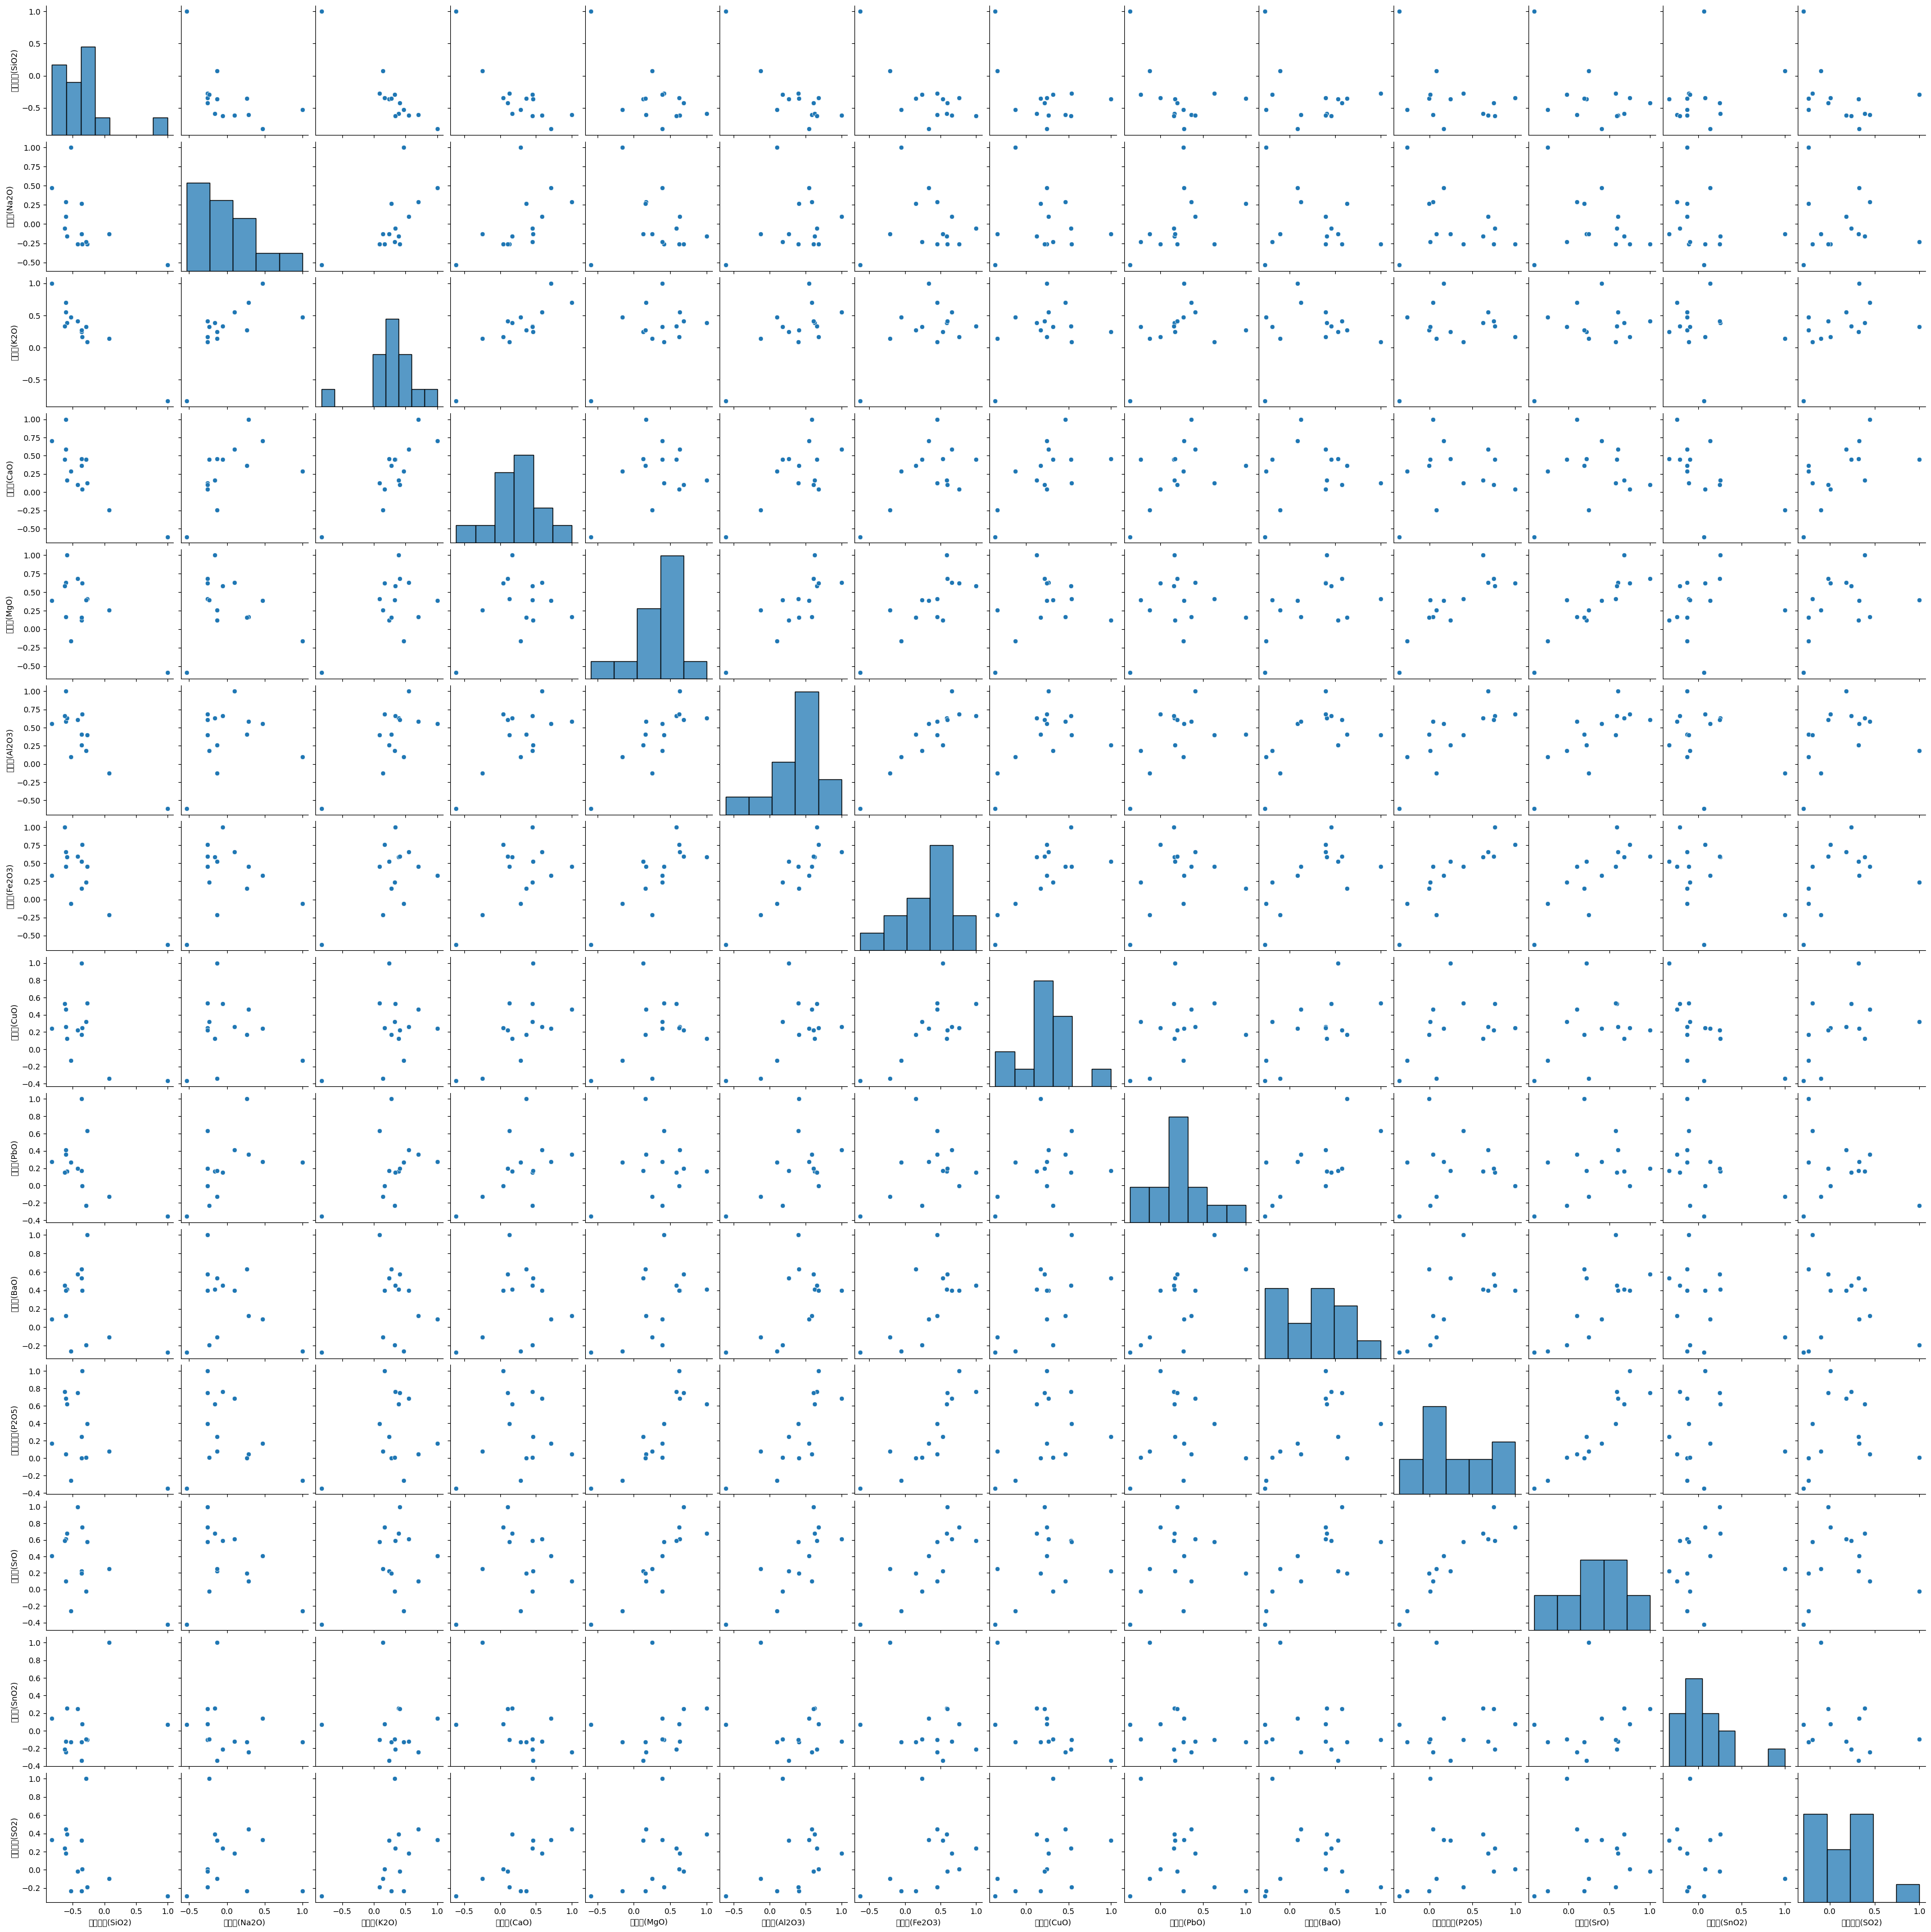

In [11]:
df = Gao_data
shifted_cols = df.columns
corrmat = df[shifted_cols].corr()
sns.pairplot(corrmat)